In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
%matplotlib inline

In [2]:
os.chdir('c:\\Users\\dsaldias\\Desktop\\Costo fabril\\ENEA')
df = pd.read_excel('Analisis_procesos_PV.xlsx',sheet_name='Base_datos')
df.columns

c:\Users\dsaldias\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Index(['Codigo producto terminado', 'Descripcion producto terminado', 'Linea',
       'Modulo de linea', 'Codigo materia prima', 'Descripcion materia prima',
       'Muestra', 'UMI', 'Receta', 'Fecha muestra', 'Filtro'],
      dtype='object')

In [3]:
df['PT y fecha'] = df['Descripcion producto terminado']+" - "+df['Fecha muestra'].dt.strftime('%d/%m/%Y')
df.columns

Index(['Codigo producto terminado', 'Descripcion producto terminado', 'Linea',
       'Modulo de linea', 'Codigo materia prima', 'Descripcion materia prima',
       'Muestra', 'UMI', 'Receta', 'Fecha muestra', 'Filtro', 'PT y fecha'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Codigo producto terminado       2297 non-null   int64         
 1   Descripcion producto terminado  2297 non-null   object        
 2   Linea                           2297 non-null   object        
 3   Modulo de linea                 2297 non-null   object        
 4   Codigo materia prima            2297 non-null   int64         
 5   Descripcion materia prima       2297 non-null   object        
 6   Muestra                         2297 non-null   int64         
 7   UMI                             2297 non-null   object        
 8   Receta                          2297 non-null   int64         
 9   Fecha muestra                   2297 non-null   datetime64[ns]
 10  Filtro                          1807 non-null   object        
 11  PT y

In [5]:
os.getcwd()

'c:\\Users\\dsaldias\\Desktop\\Costo fabril\\ENEA'

In [21]:
PT = df['PT y fecha'].drop_duplicates()
#CF = {}
CF2 = {}
for pt in PT:
    CF = {}
    df2 = df[df['PT y fecha']==pt]
    ML = df2['Modulo de linea'].drop_duplicates()
    for ml in ML:
        df3 = df2[df2['Modulo de linea']==ml]
        q3, q1 = np.percentile(df3.Muestra,[75,25])
        iqr = q3 - q1
        CF[ml] = iqr
    CF2[pt] = CF
print(CF2)

{'TORTA CREMA PIÑA 15 P WALMART - 07/06/2022': {'Dosificador 1 Remojo': 12.25, 'Dosificador 1 Crema': 3.0, 'Dosificador 1 Mermelada': 3.5, 'Dosificador 2 Remojo': 5.75, 'Dosificador 2 Crema': 1.75, 'Dosificador 2 Mermelada': 5.0, 'Dosificador 3 Remojo': 6.5, 'Dosificador Rebozado': 2.5, 'Rebosado en producto': 8.75, 'Dosificador moños': 5.75}, 'TORTA CHOCOLATE MANJAR WALMART - 07/06/2022': {'Dosificador 1 Remojo': 16.0, 'Disificado manjar 1': 33.75, 'Dosificador 1 Mermelada': 12.25, 'Dosificador 2 Remojo': 10.25, 'Dosificado manjar 2': 28.75, 'Dosificador 2 Mermelada': 23.5, 'Dosificador 3 Remojo': 24.5, 'Rebosado en producto': 9.75, 'Baño chocolate': 6.5, 'Moños manjar': 6.25}, 'TORTA SACHER QUINTA - 09/06/2022': {'Dosificador 1 Remojo': 14.0, 'Dosificador 1 Crema': 3.0, 'Dosificador 1 Mermelada': 11.0, 'Dosificador 2 Remojo': 7.0, 'Dosificador 2 Crema': 6.0, 'Dosificador 2 Mermelada': 6.0, 'Dosificador 3 Remojo': 6.0, 'Dosificador Rebozado': 6.0, 'Rebosado en producto': 19.0, 'Baño c

41.25


C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21:

49.75


C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21:

45.5


C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21:

27.75


C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21:

55.25


C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21:

27.75


C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21:

36.5


C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21:

48.0


C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21:

24.0


C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21:

62.75


C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21:

42.5


C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21:

37.5


C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21:

42.5


C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21:

60.0


C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21:

57.75


C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21:

123.25


C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')


29.0


C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21:

53.0


C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21:

59.25


C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21:

140.25


C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(32,10))

85.5


C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21:

35.25


C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21:

39.75


C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21:

21.0


C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(np.mean(df4['Muestra']),ml,c='k')
C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23208\1634872699.py:21:

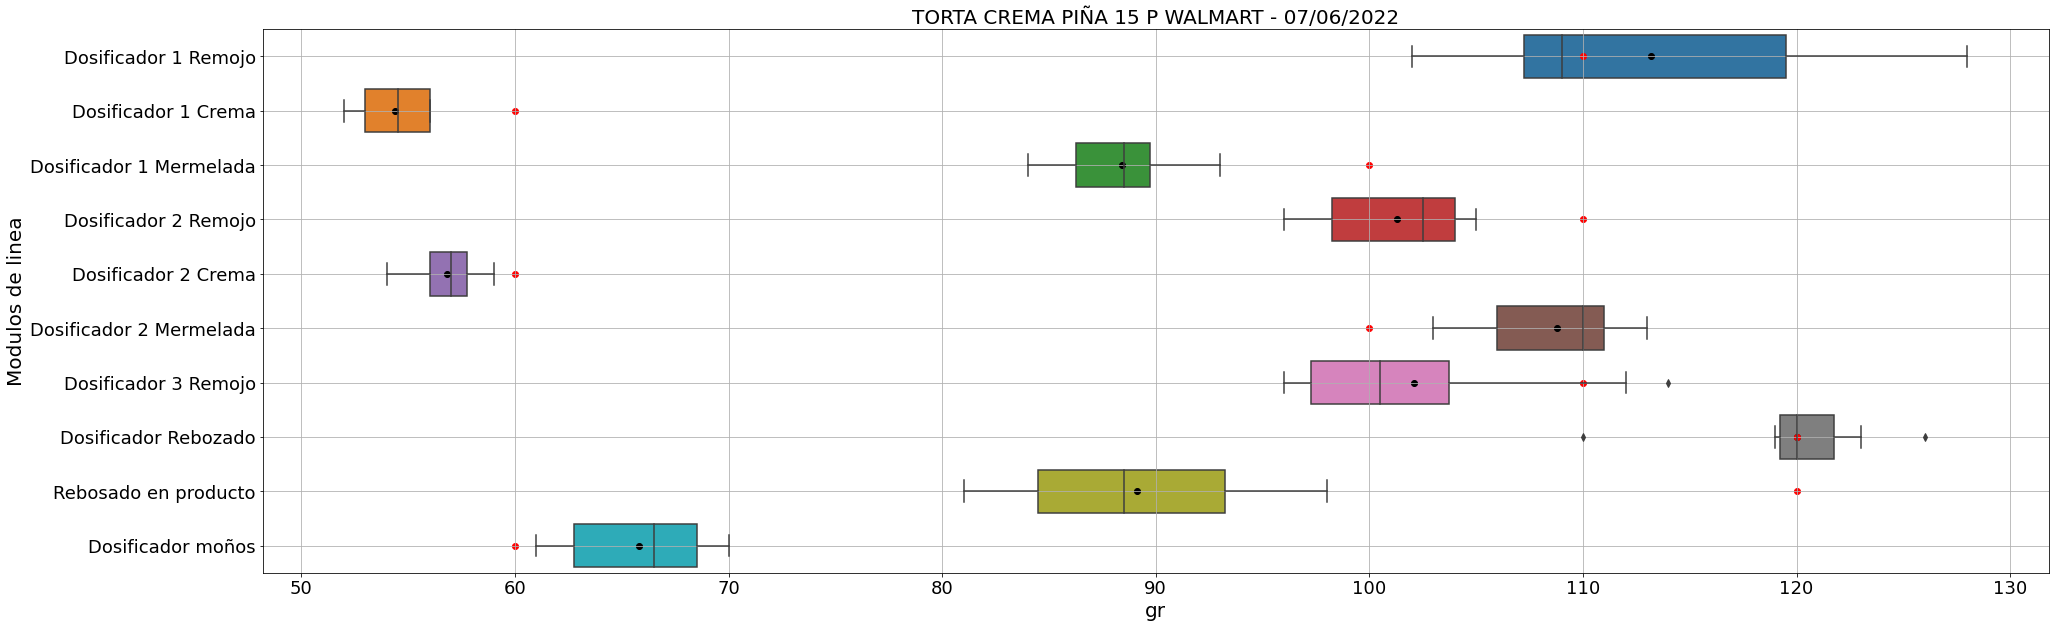

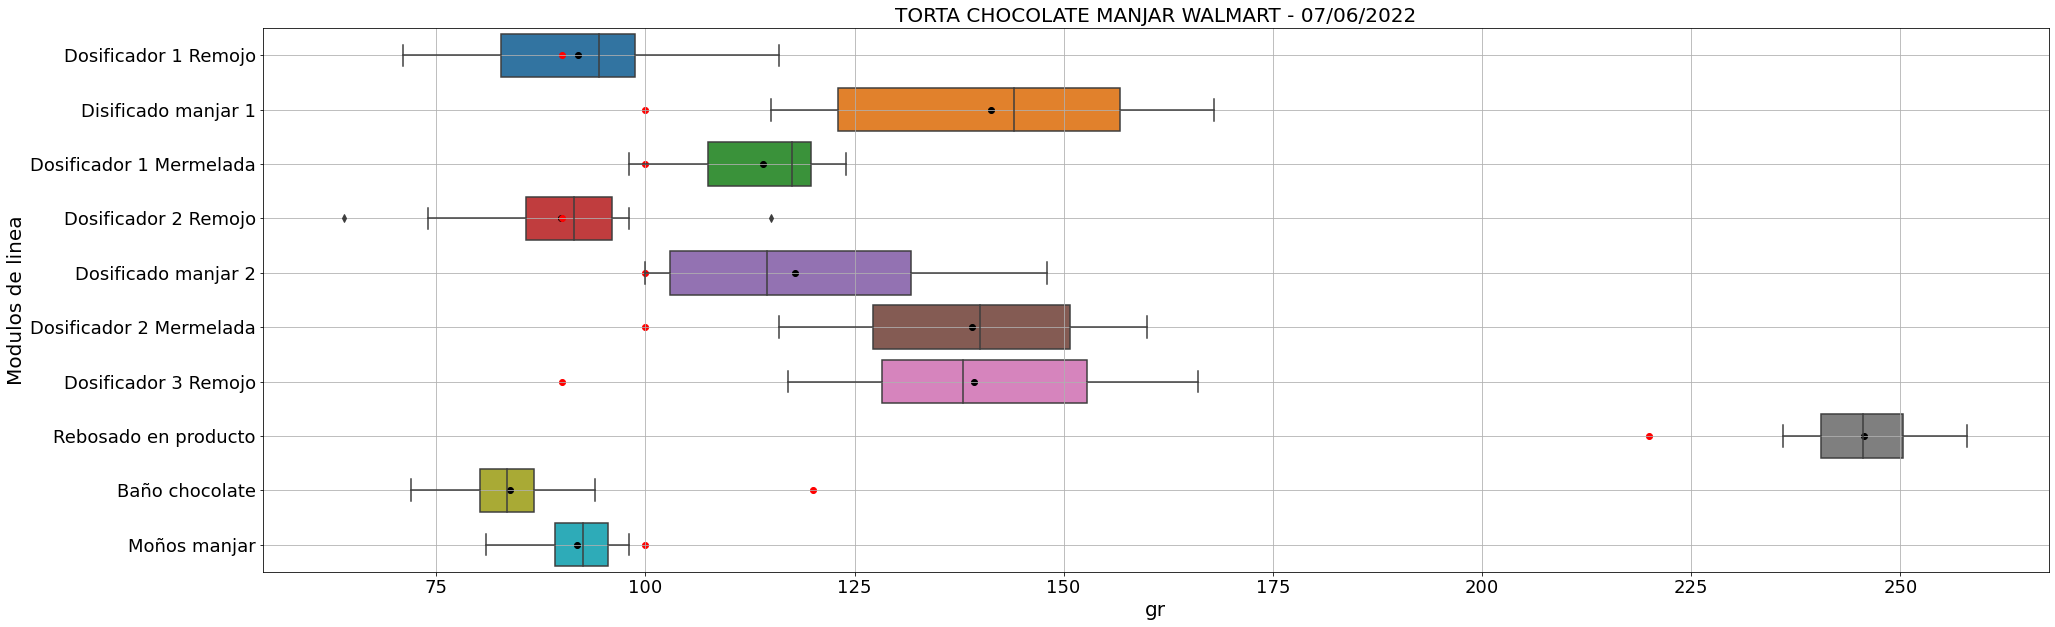

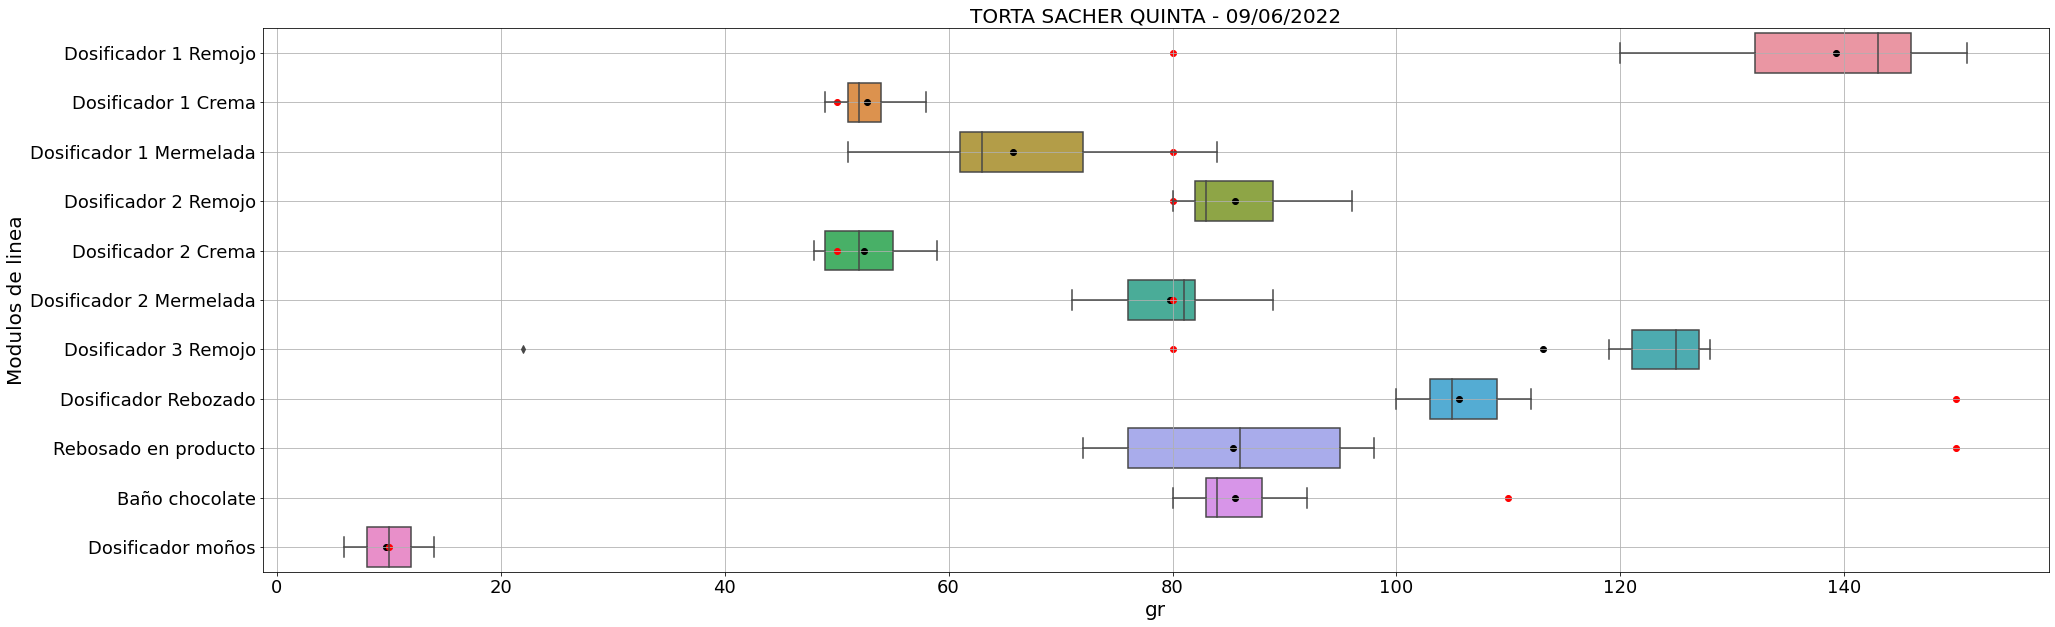

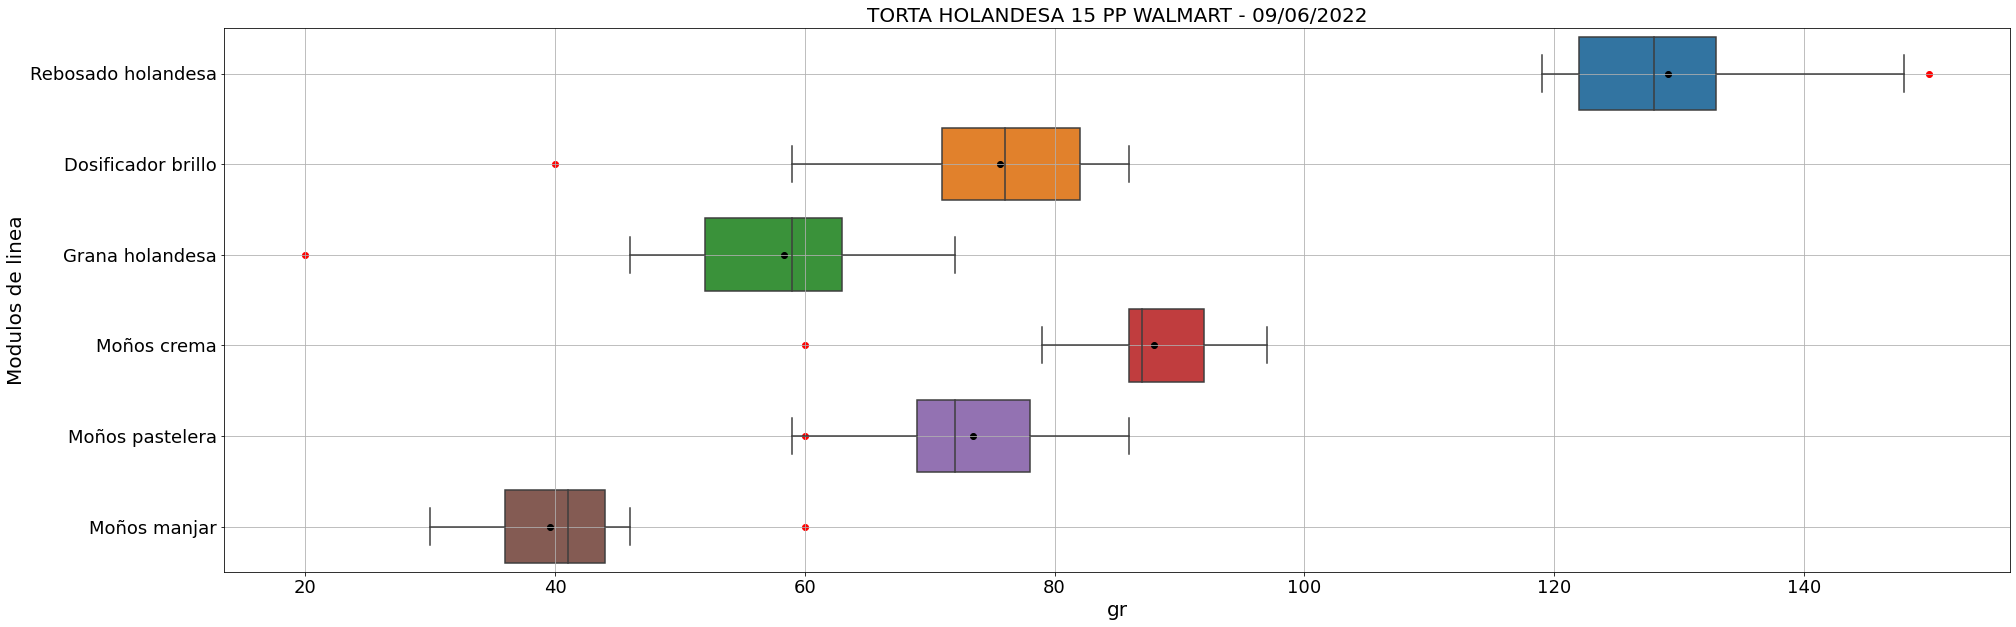

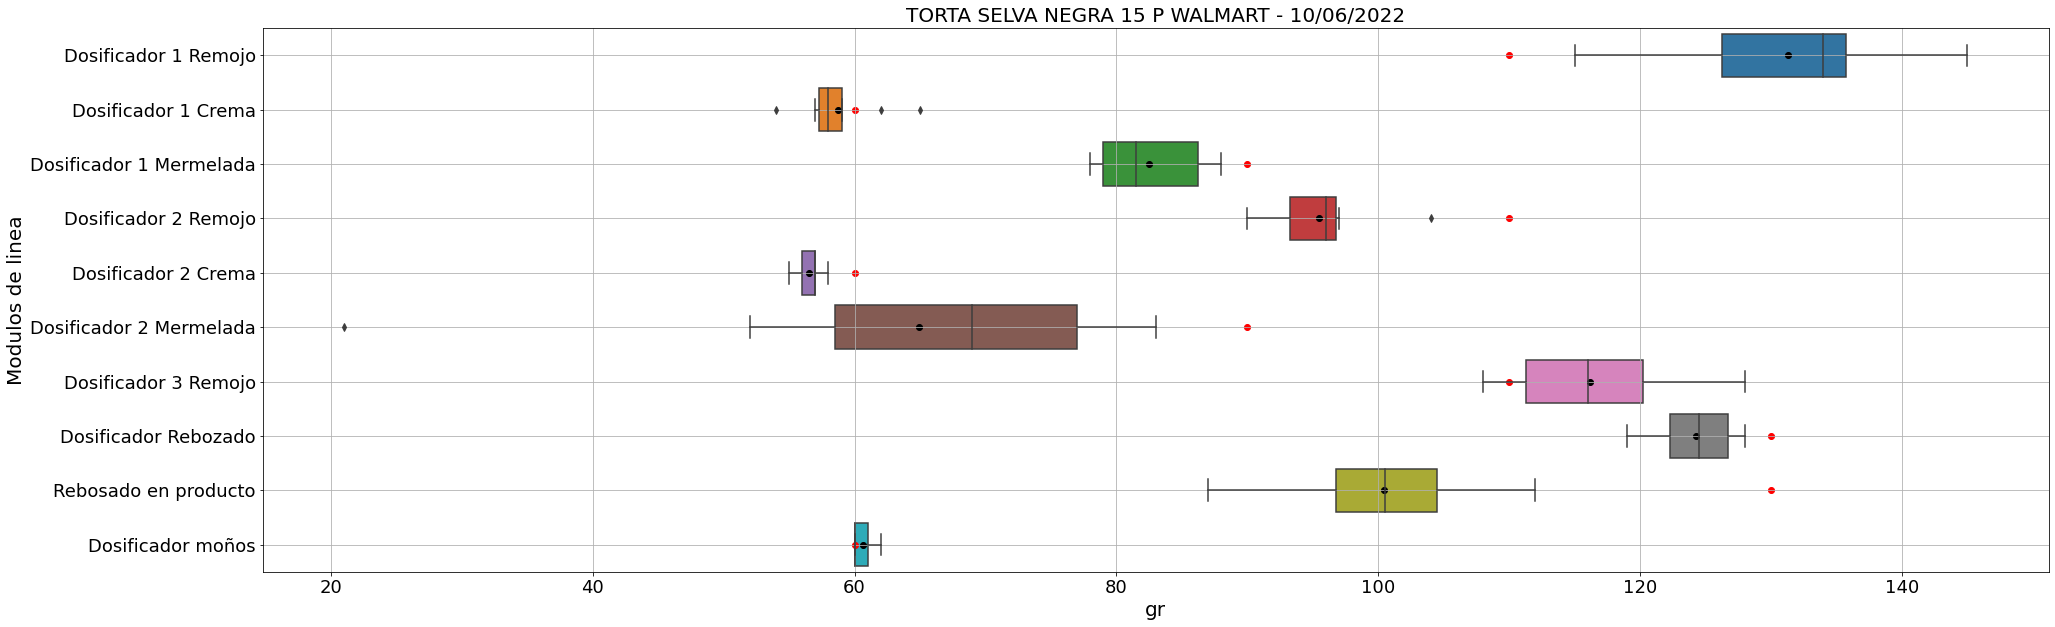

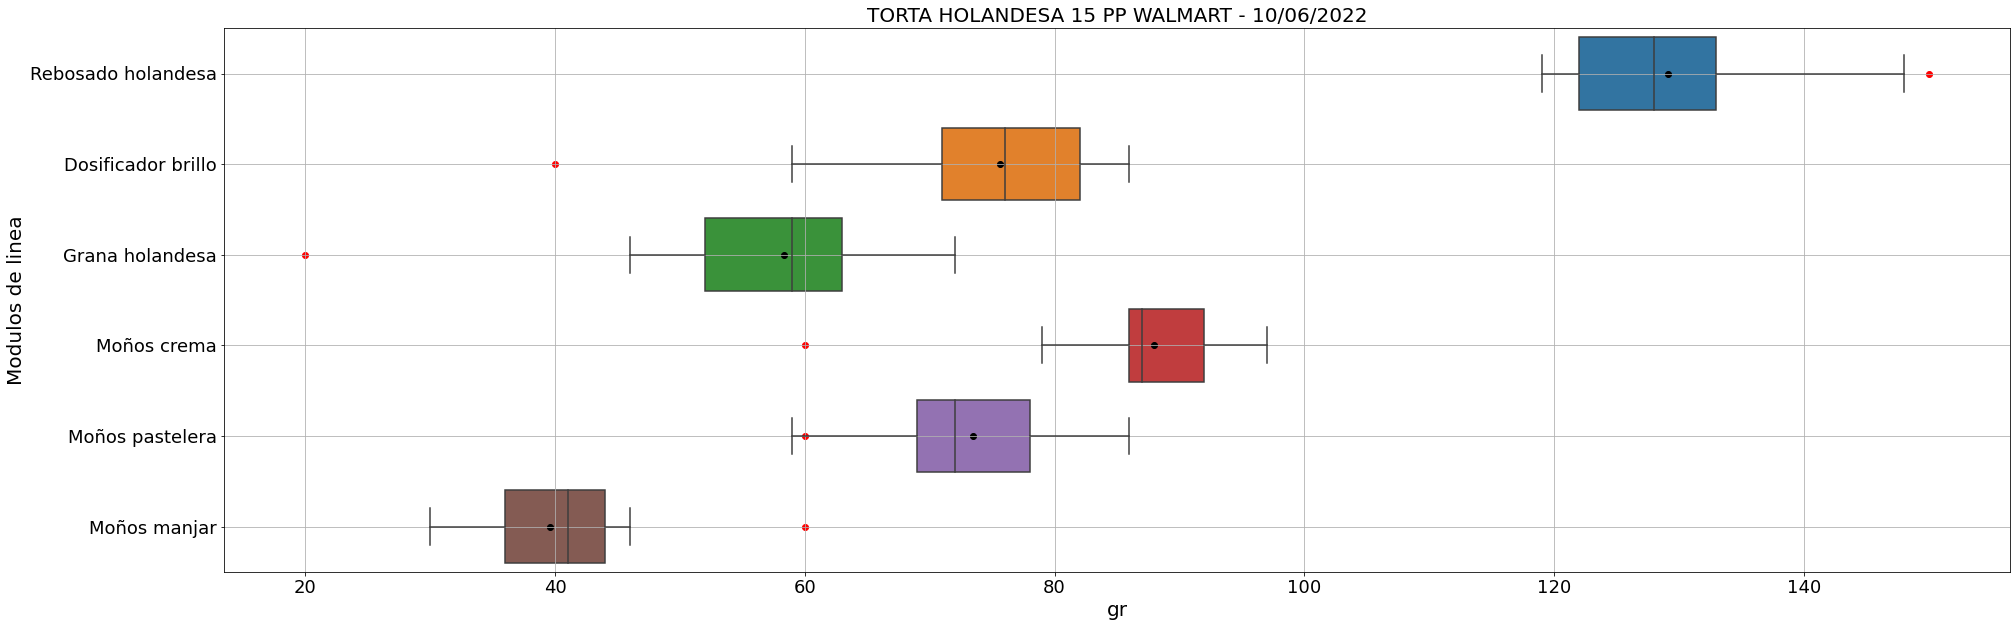

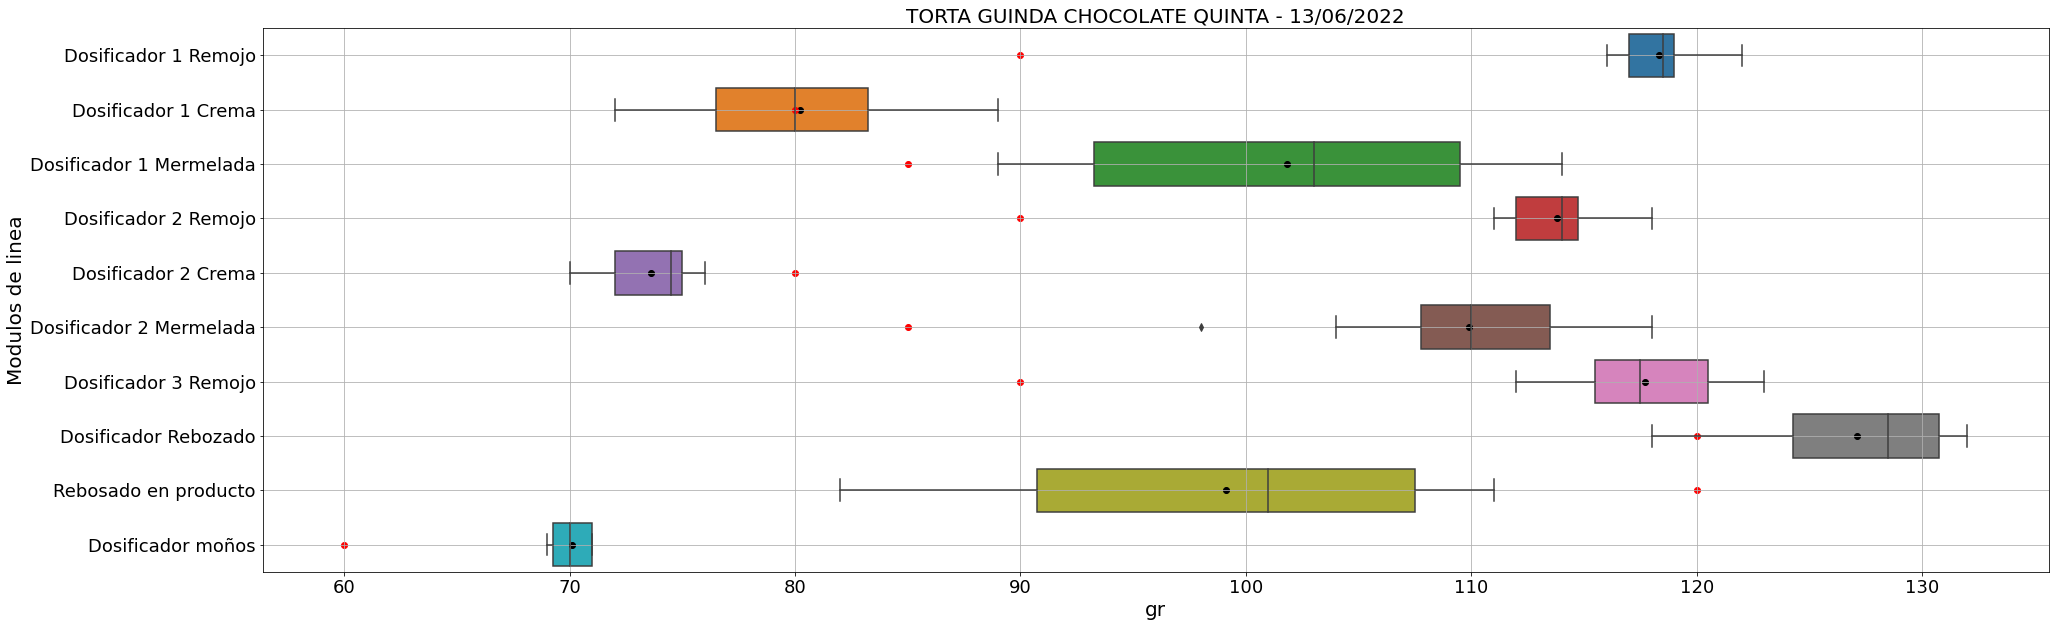

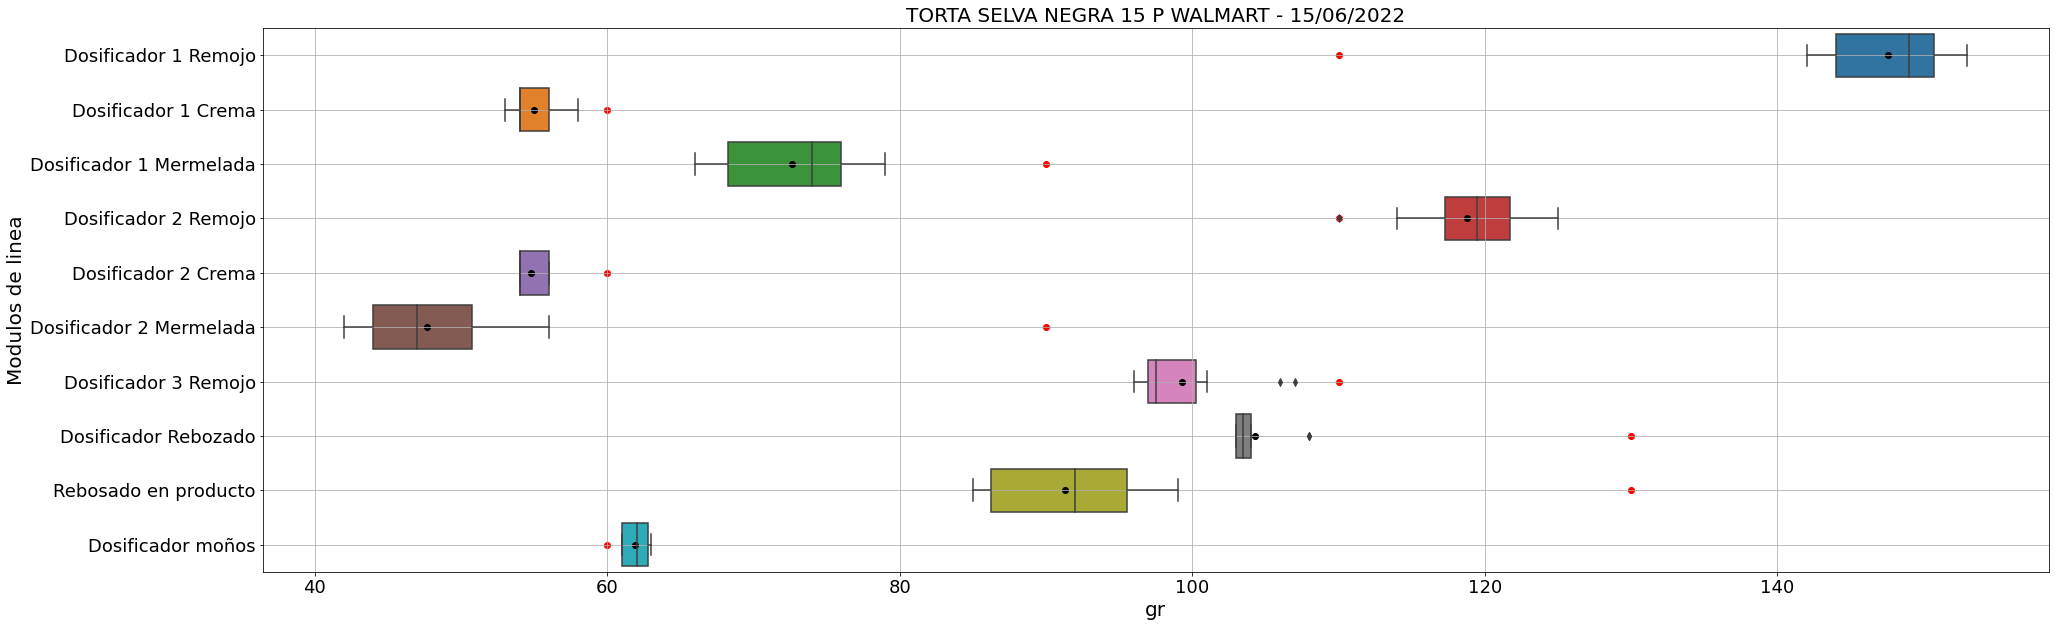

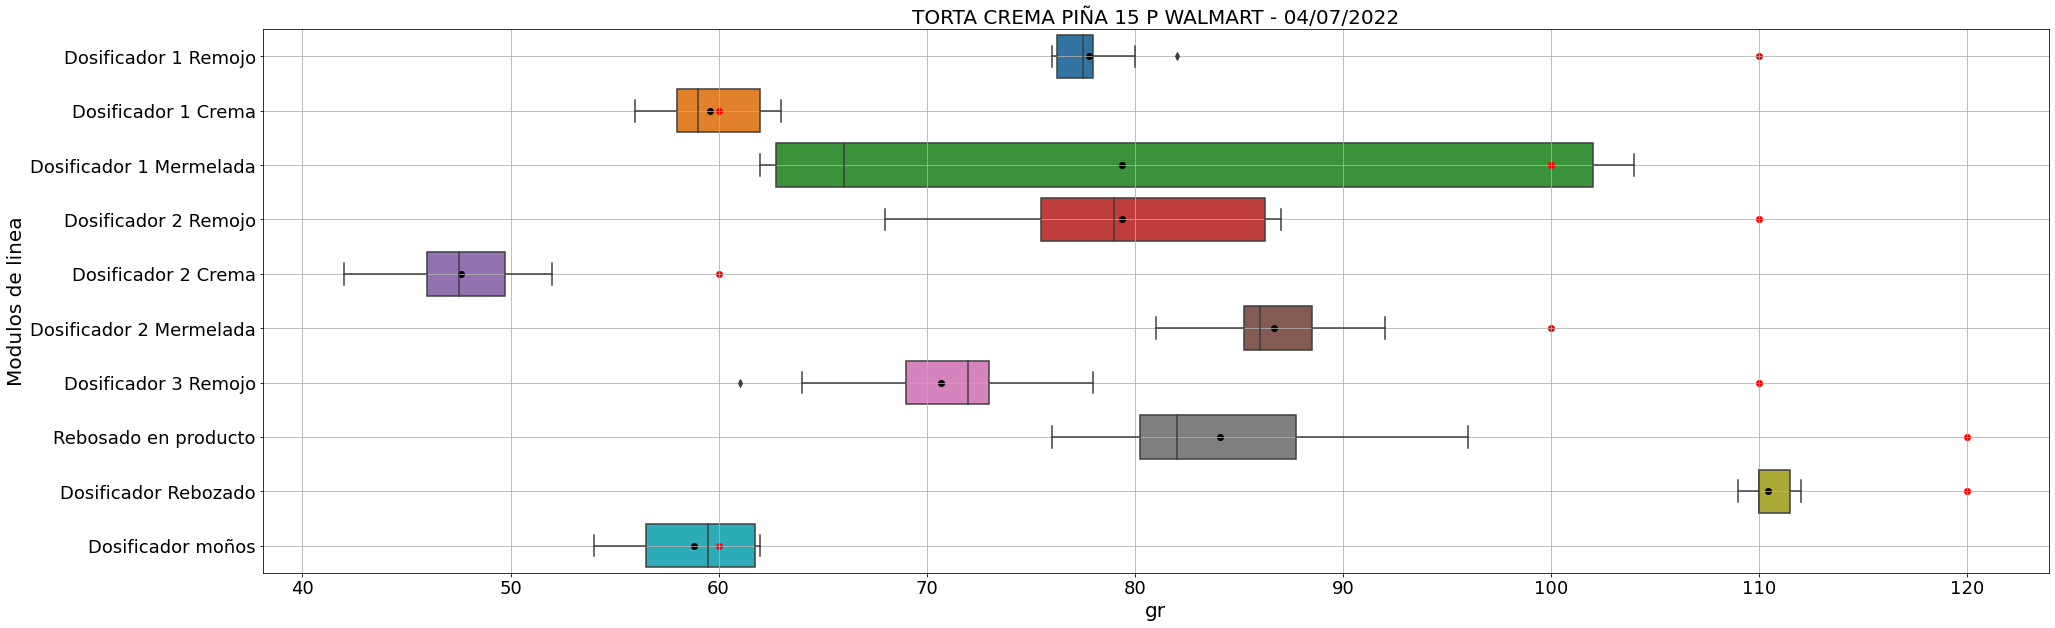

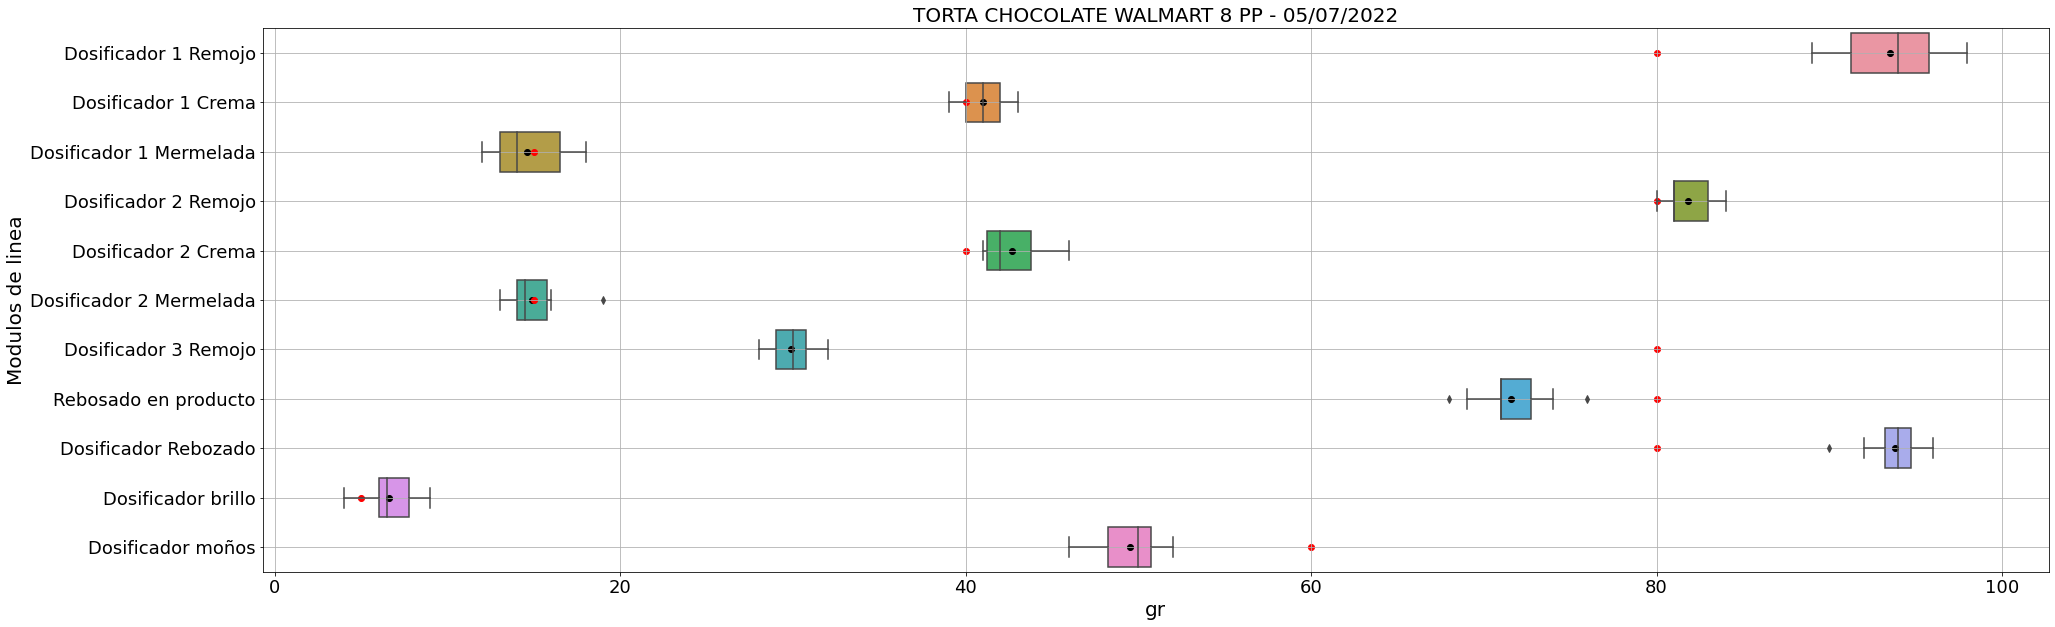

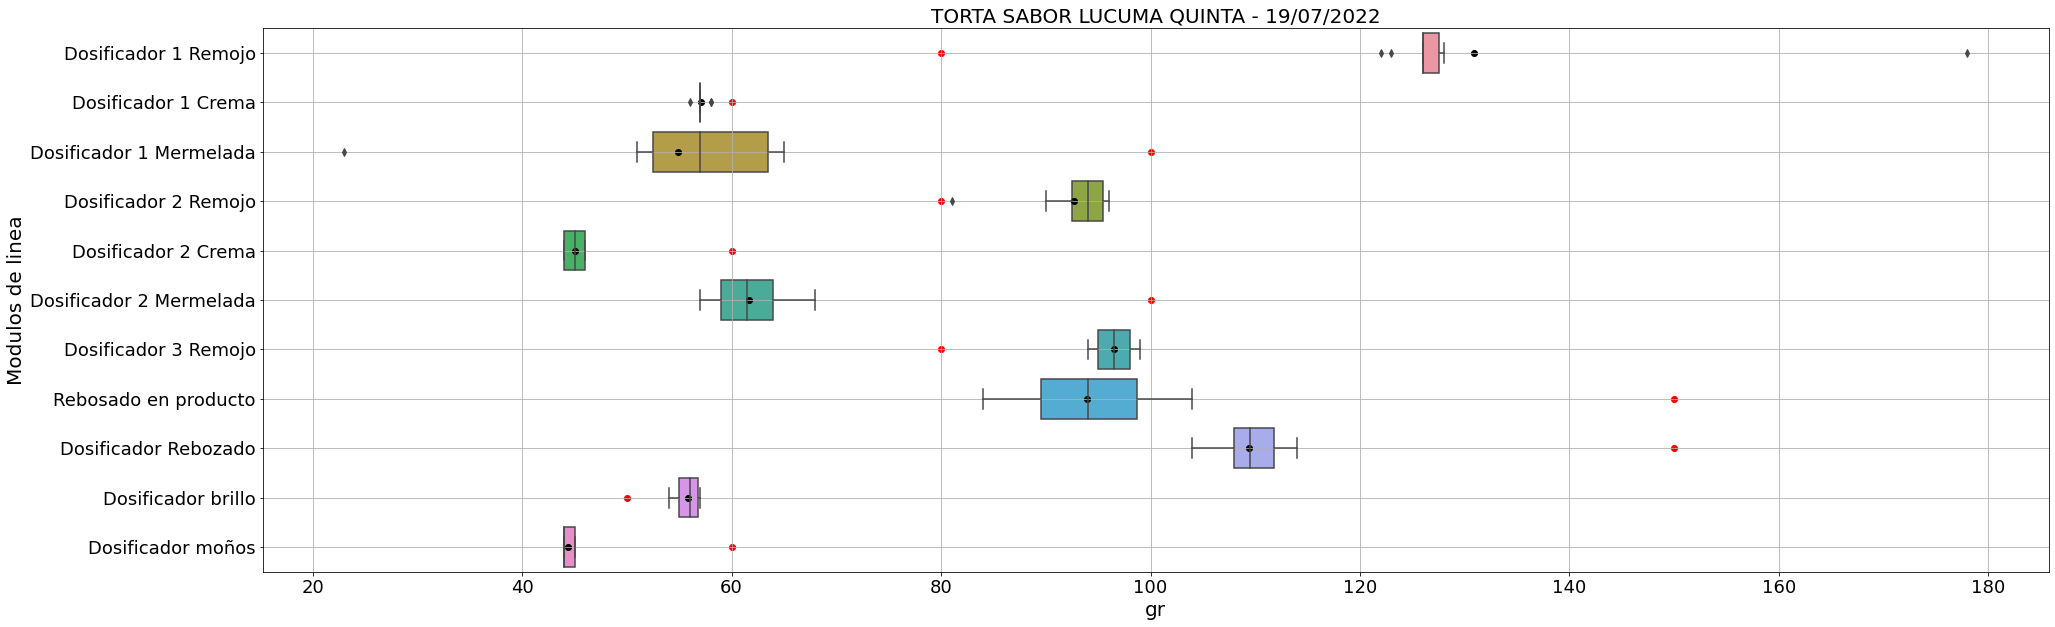

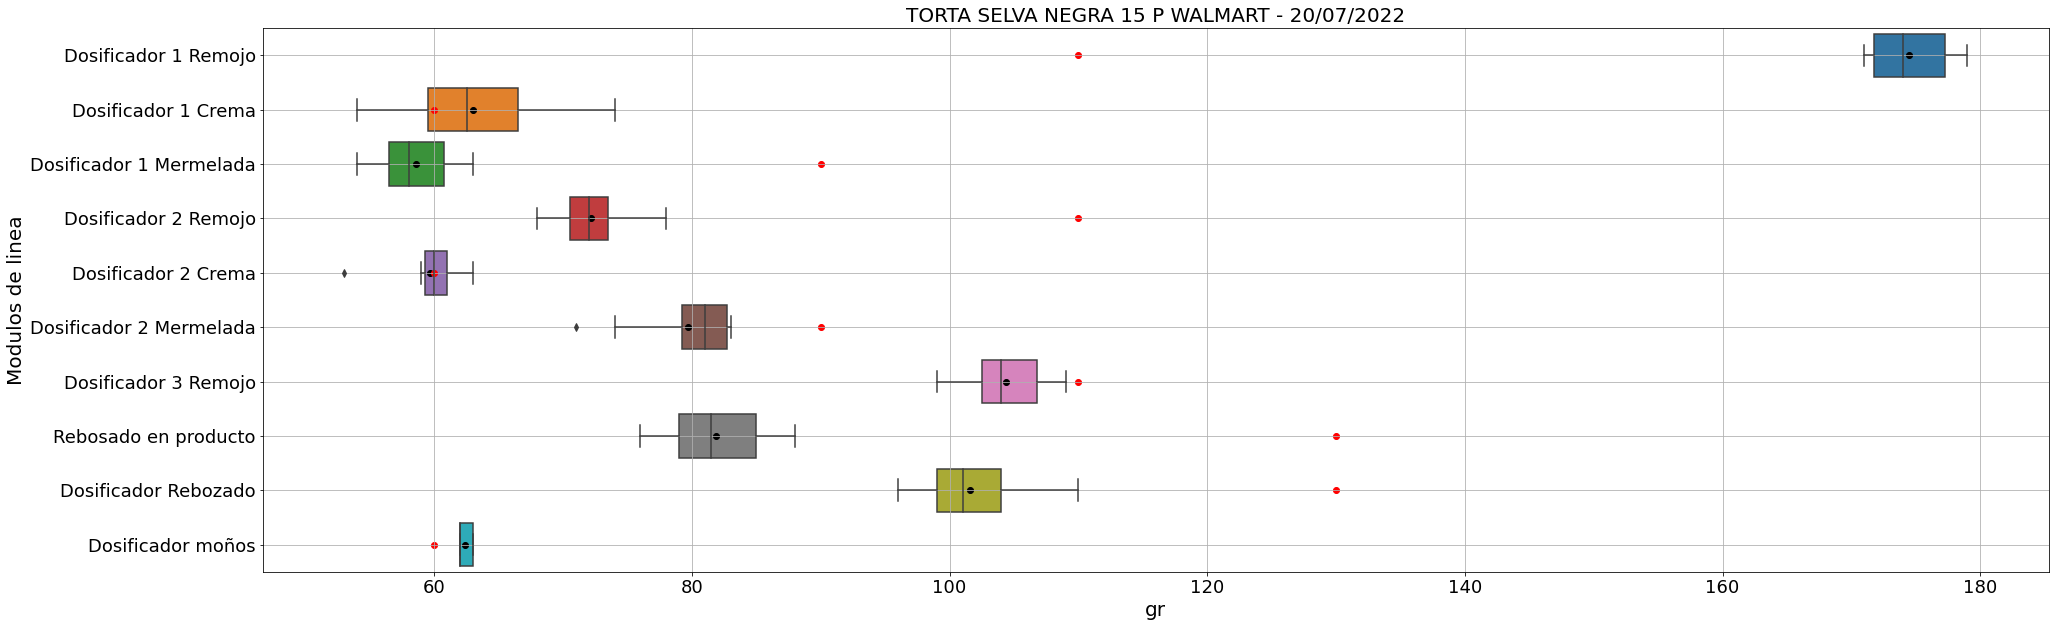

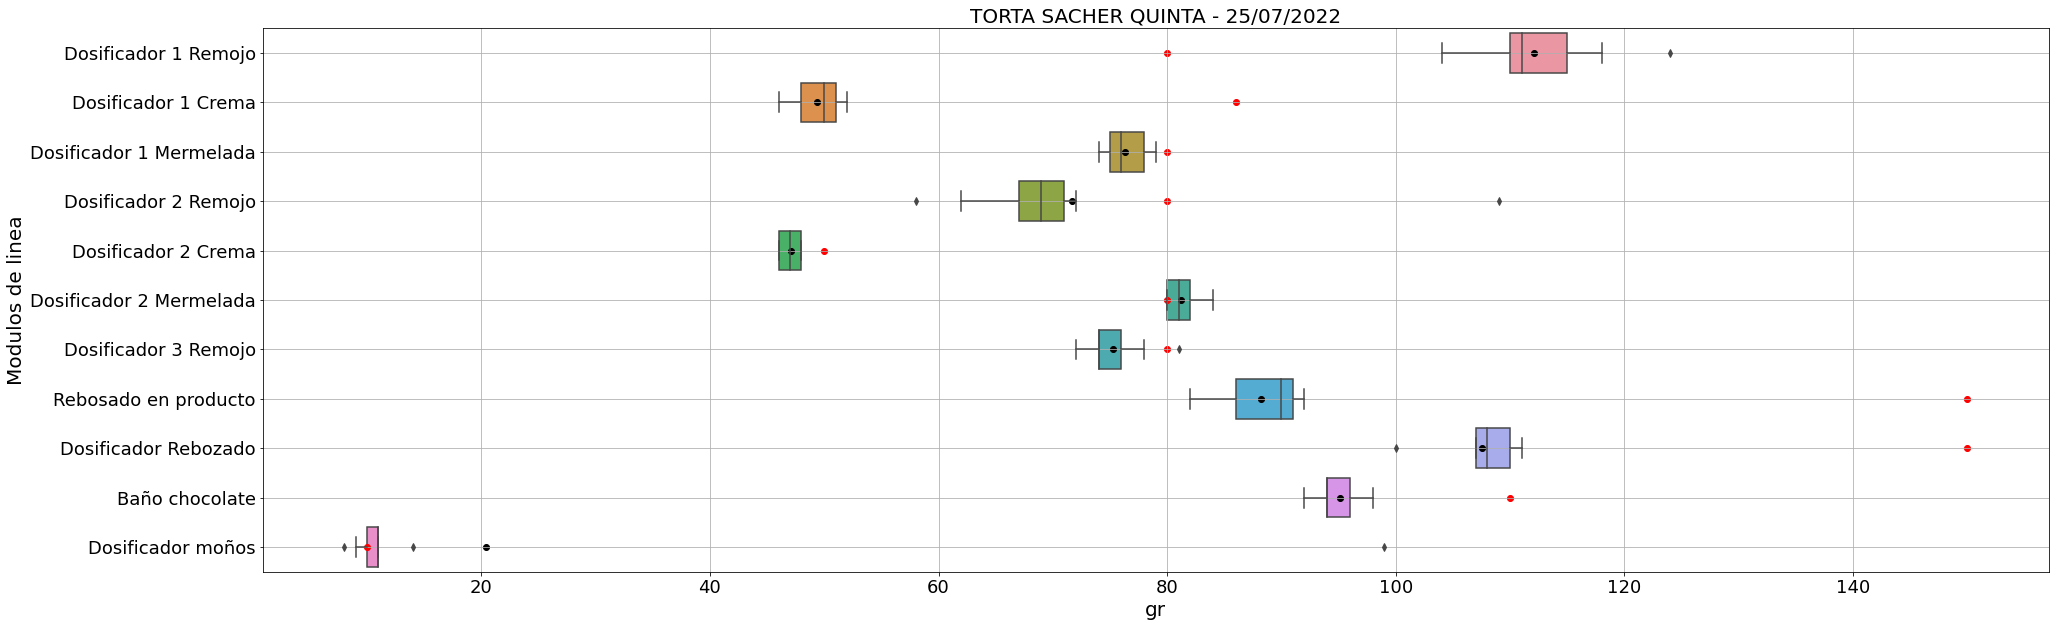

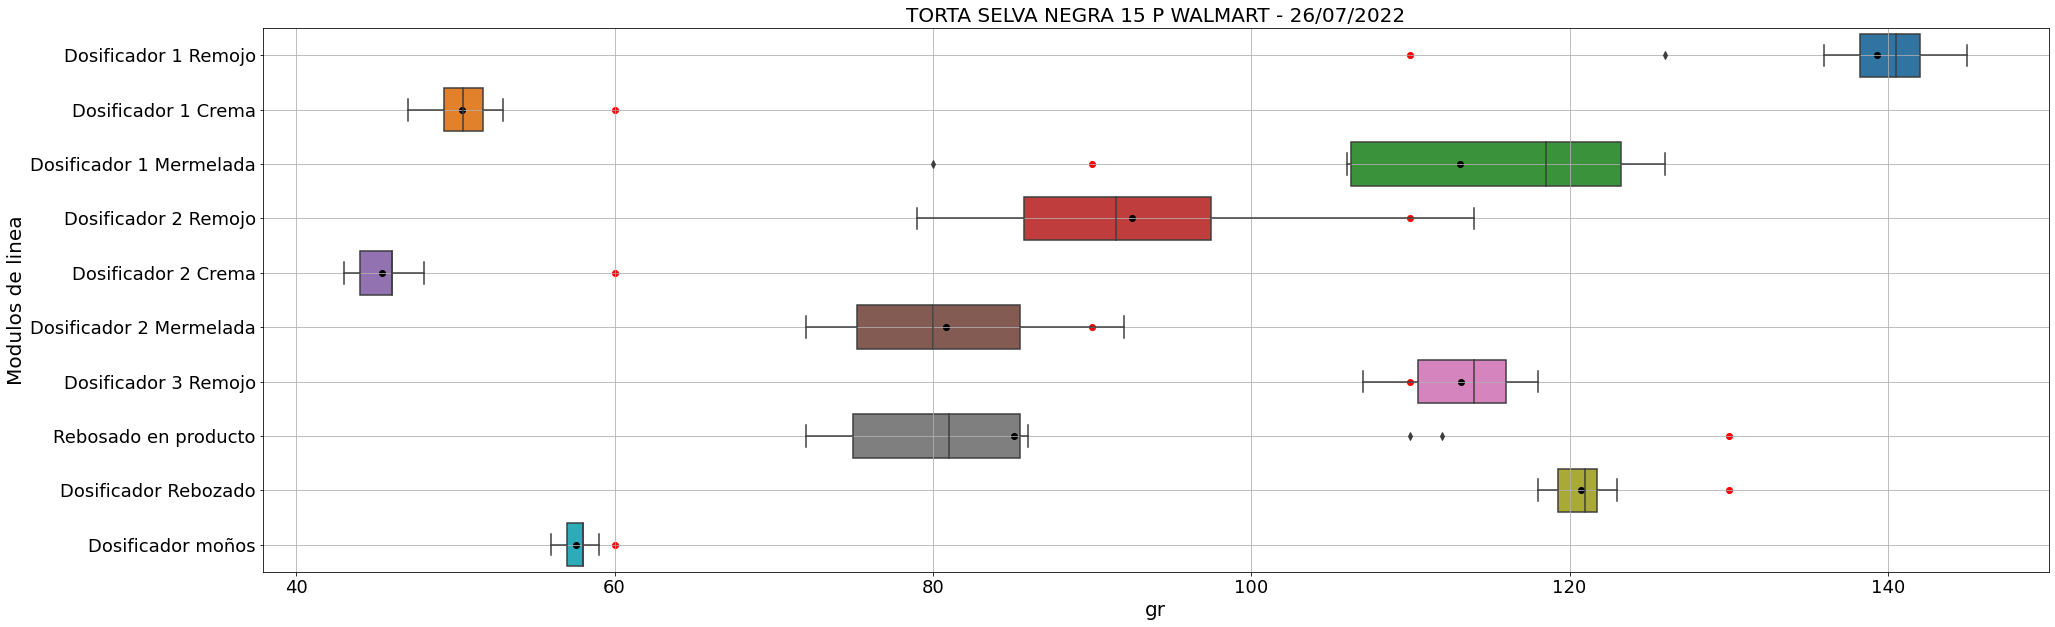

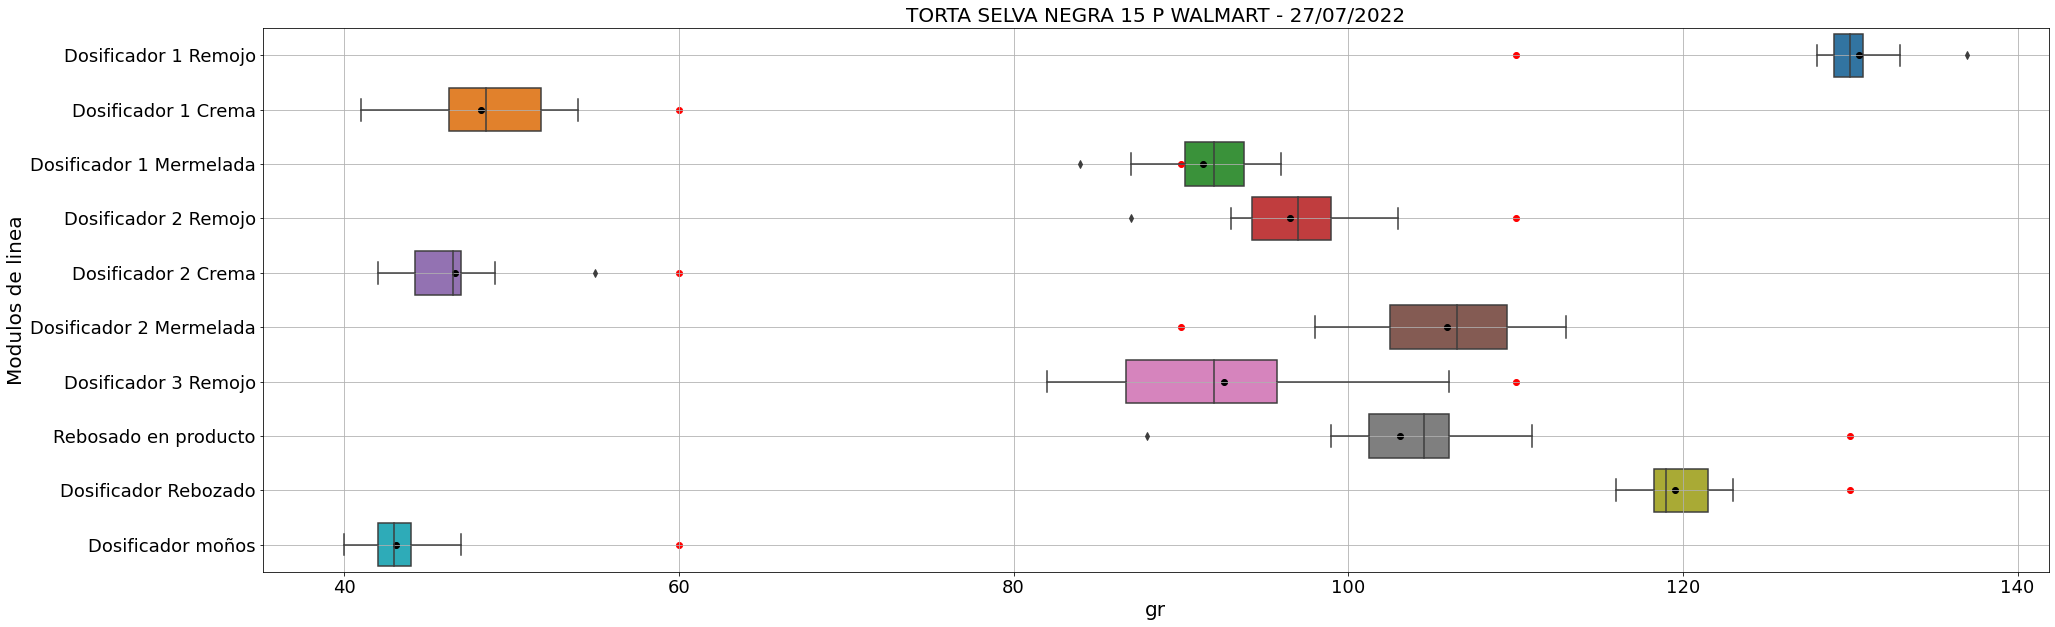

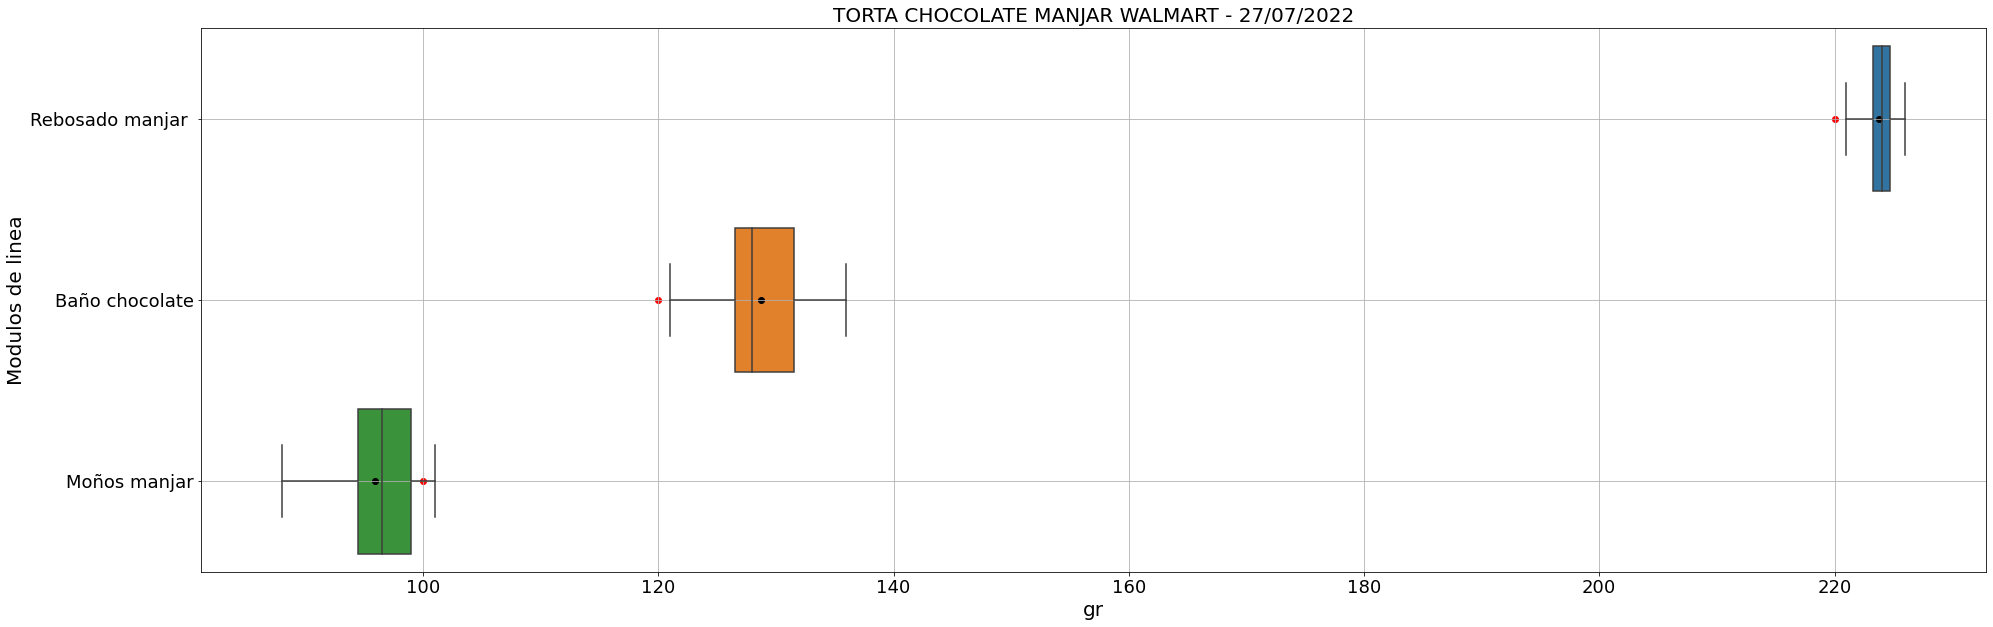

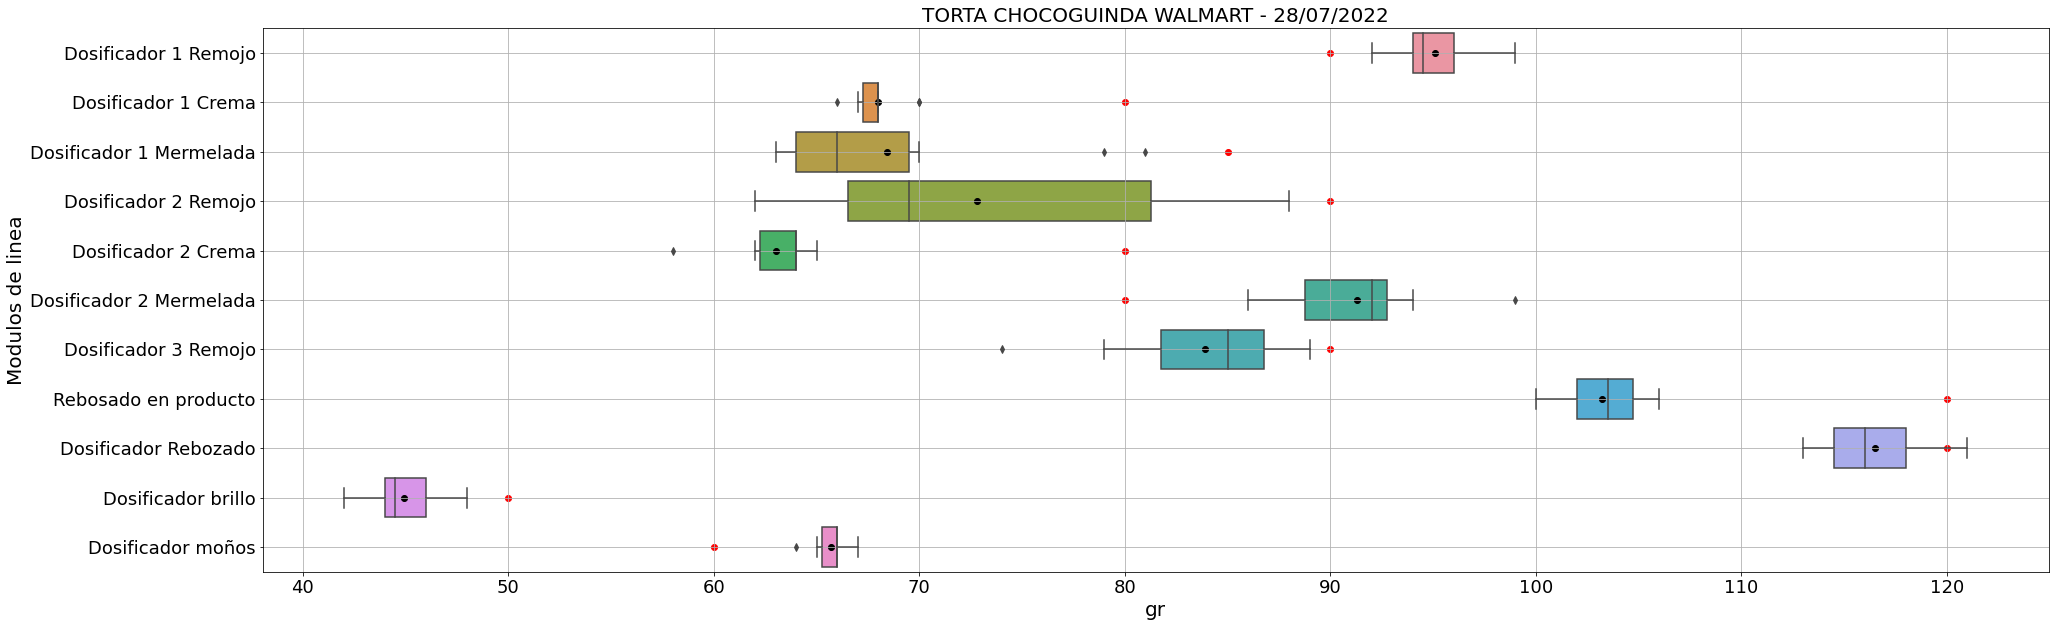

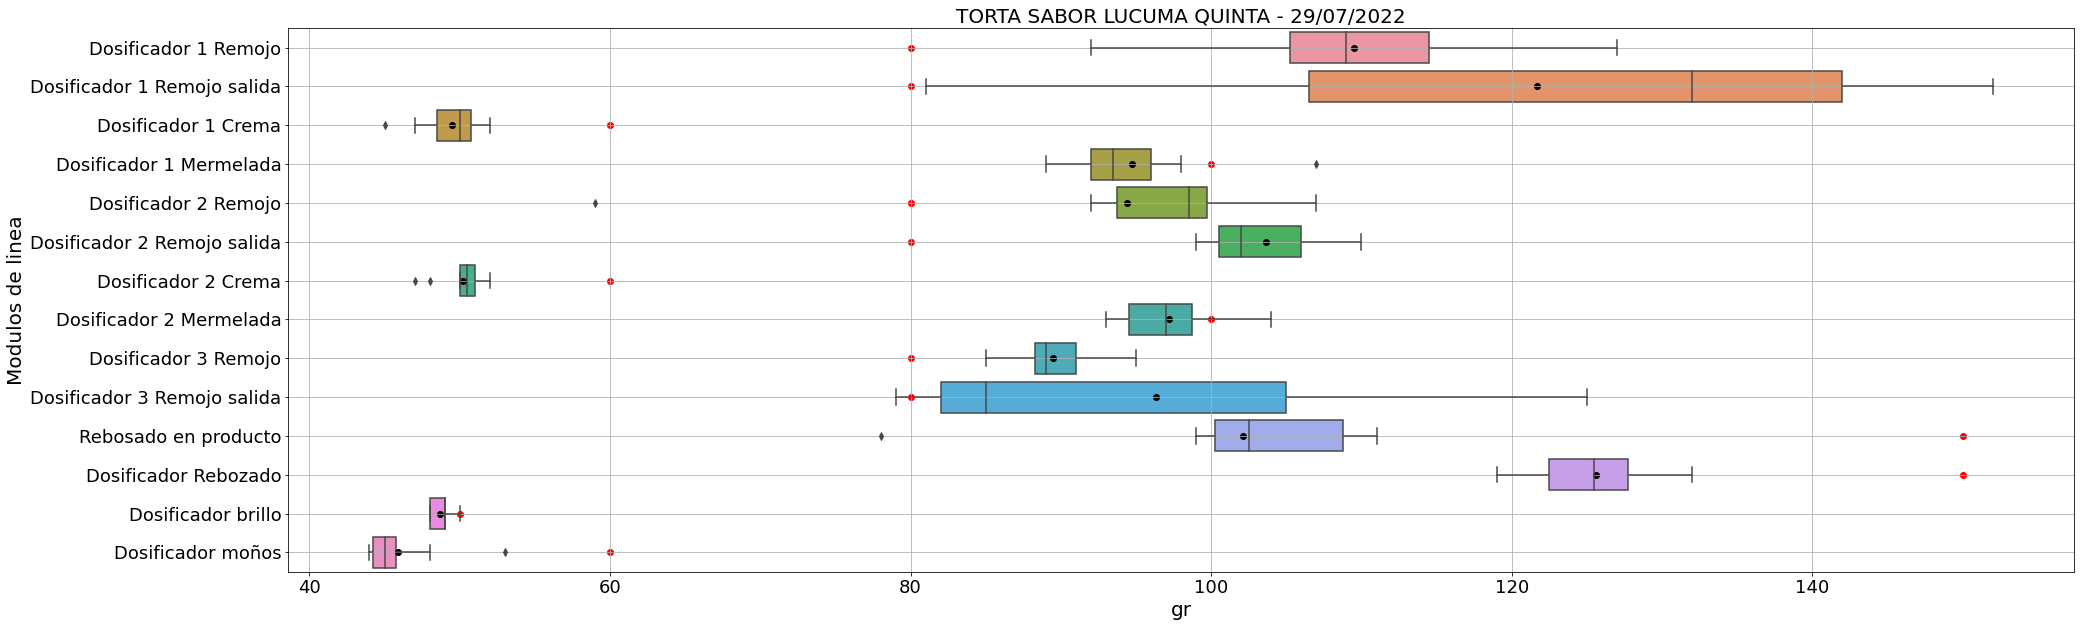

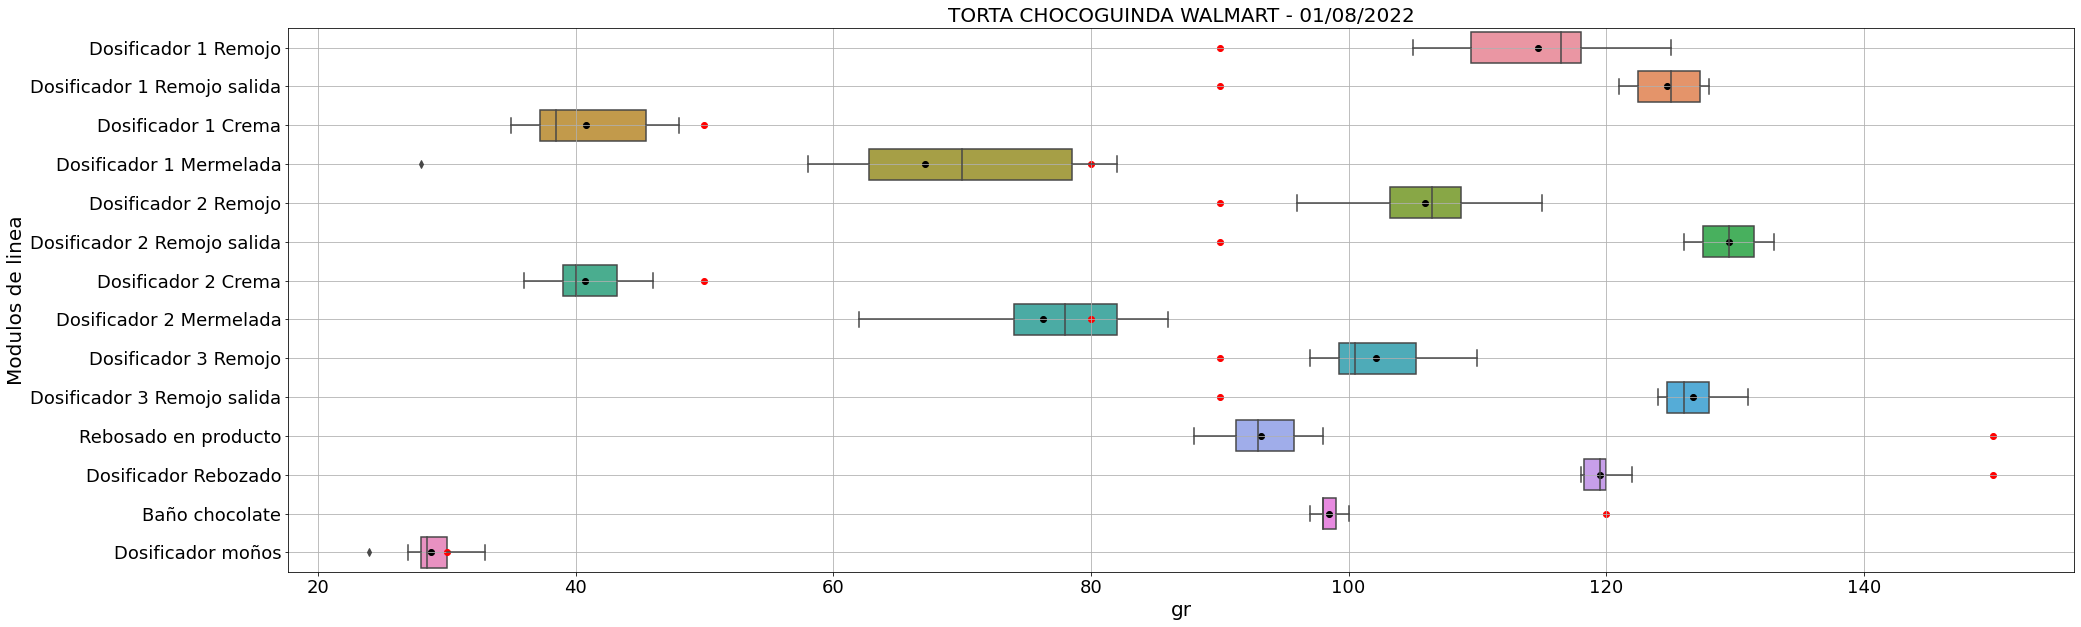

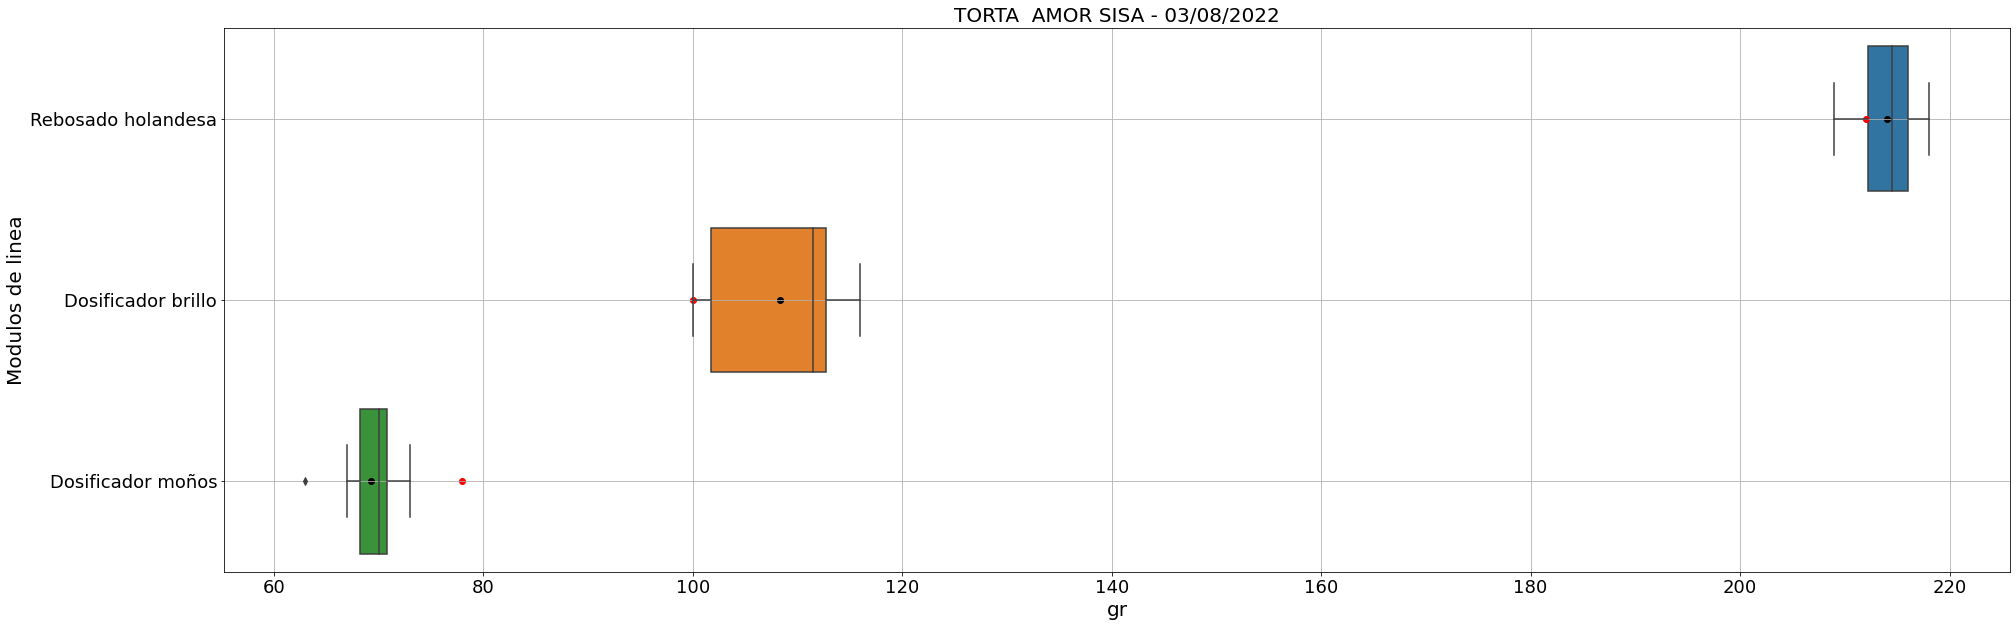

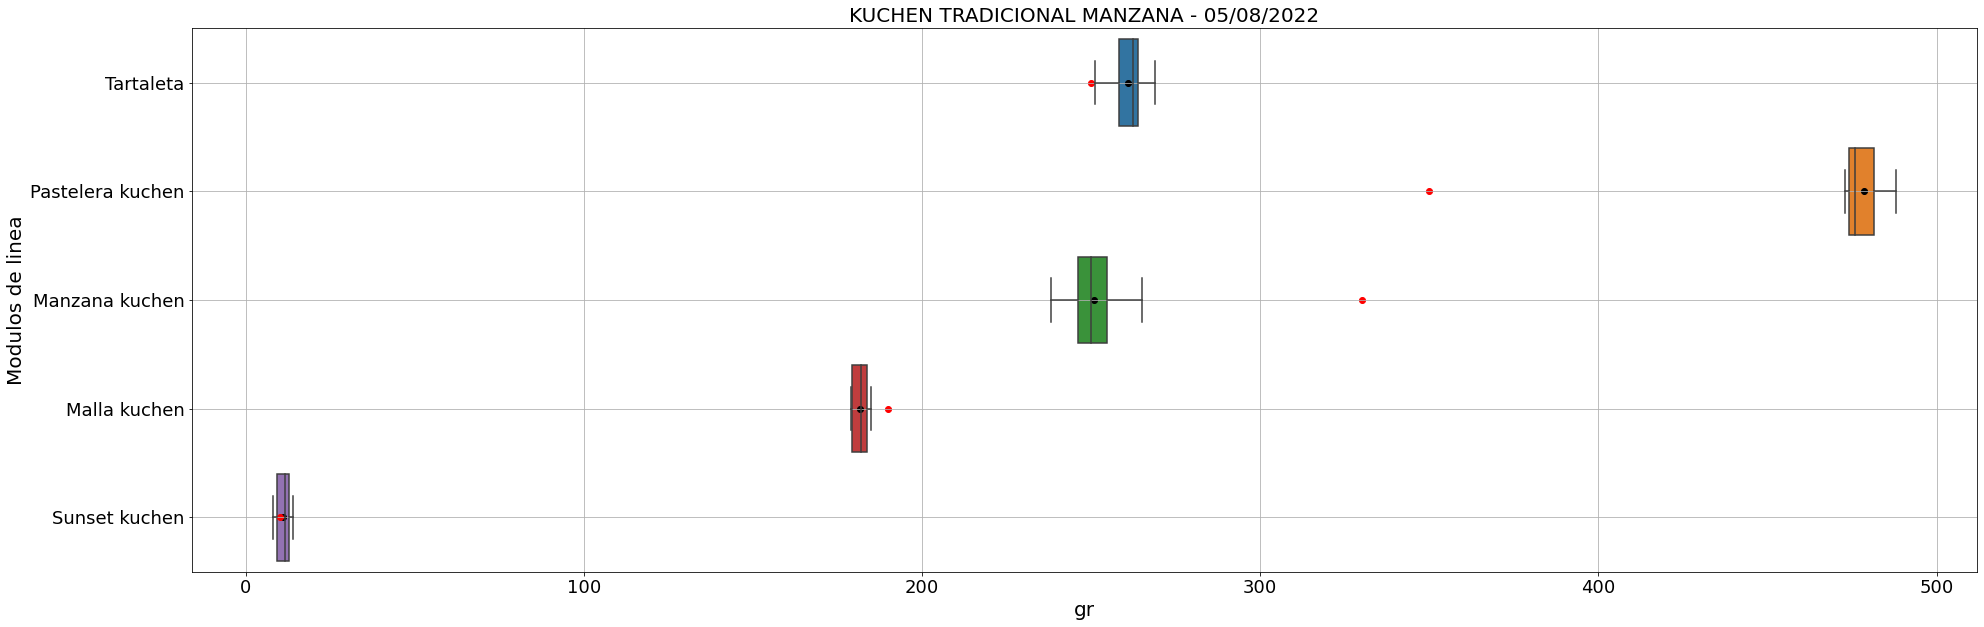

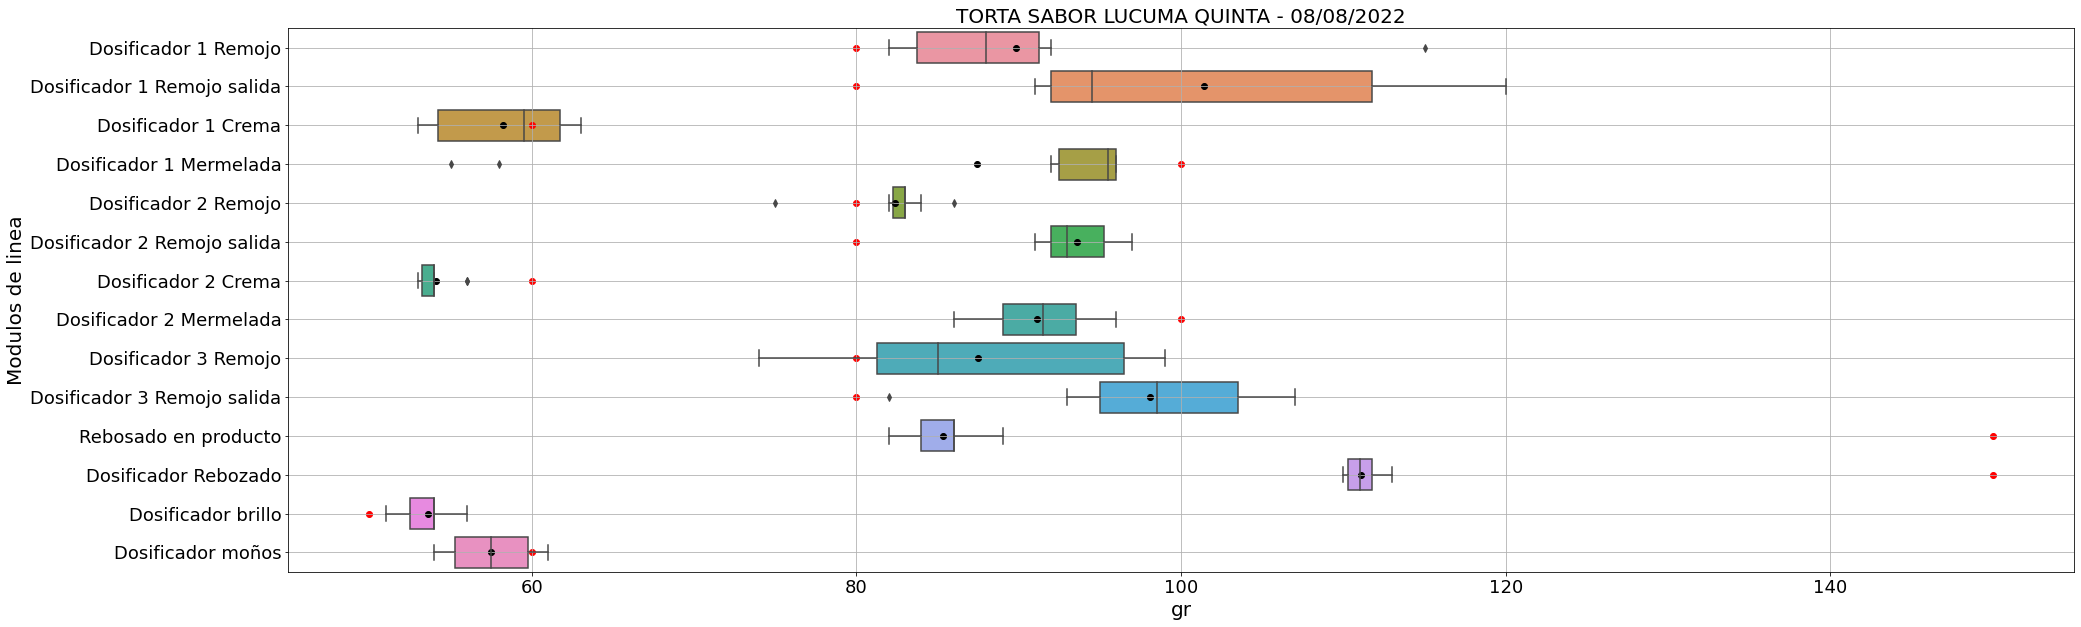

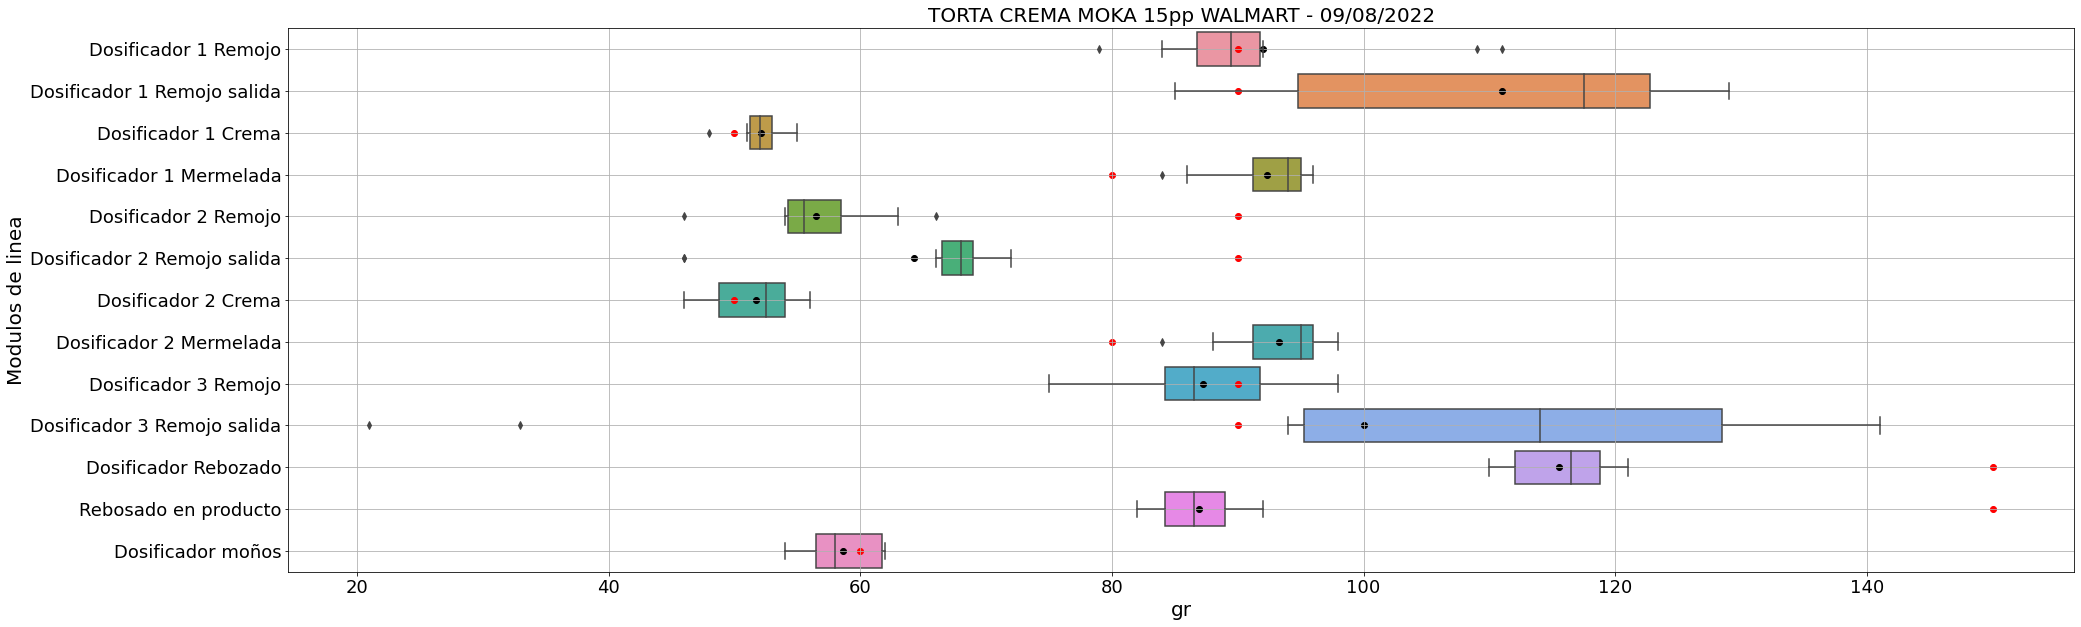

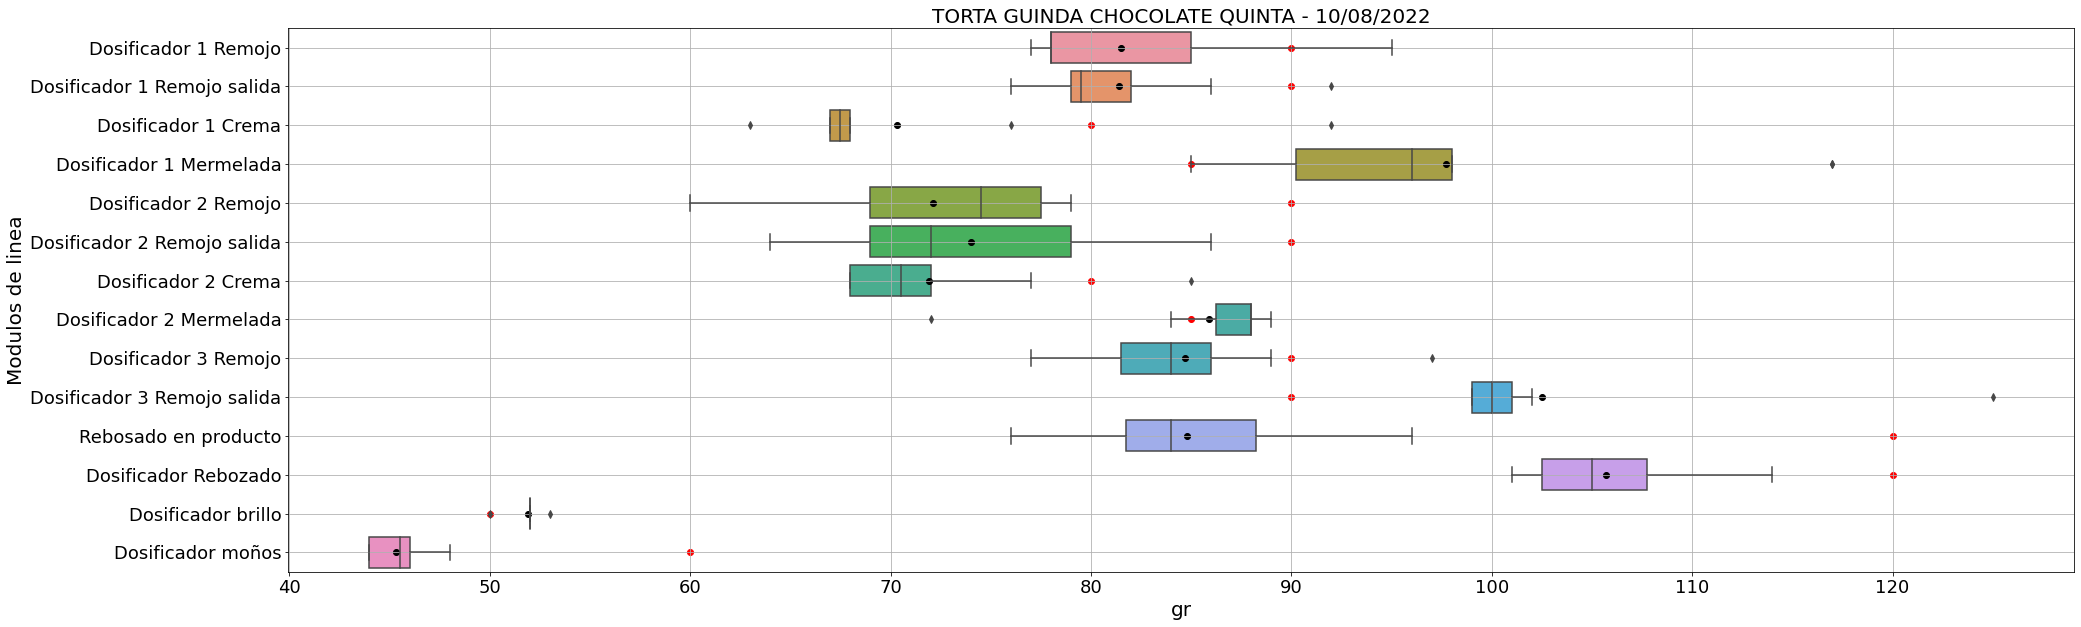

In [13]:
PT = df['PT y fecha'].drop_duplicates()
muestra = 1
for pt in PT:
    fig, ax = plt.subplots(figsize=(32,10))
    df2 = df[df['PT y fecha']==pt]
    sns.boxplot(data=df2,x='Muestra',y='Modulo de linea')
    ax.set_title(pt,size=20)
    ax.grid()
    ax.set_xlabel('gr',size=20)
    ax.set_ylabel('Modulos de linea',size=20)
    ax.tick_params(axis='x',labelsize=18)
    ax.tick_params(axis='y',labelsize=18)
    df3 = df2['Modulo de linea'].drop_duplicates()
    for ml in df3:
        df4 = df2[df2['Modulo de linea']==ml]
        #x1 = ax.xaxis.convert_units(np.mean(df4['Muestra']))
        #x1 = np.mean(df4['Muestra'])
        ax.scatter(np.mean(df4['Muestra']),ml,c='k')
        ax.scatter(np.mean(df4['Receta']),ml,c='r')
    mus = 'Muestra'+str(muestra)
    muestra += 1
    os.chdir('c:\\Users\\dsaldias\\Desktop\\Sobreconsumo\\Veronica Sanchez\\Graficos')
    plt.savefig(str(mus)+'.jpg',format='jpg')